# §3. 最小二乗法

今回は、線形回帰を求める手法「最小二乗法」について学んでいきます。

## 1. 最小二乗法について

### 1.1. 前回のおさらい

以前に学習した単回帰モデルを求めるには、「**各点からなるべく近い位置を通る直線を求める**」という解説をしていました。

図で確認するなら、以下のとおりです。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

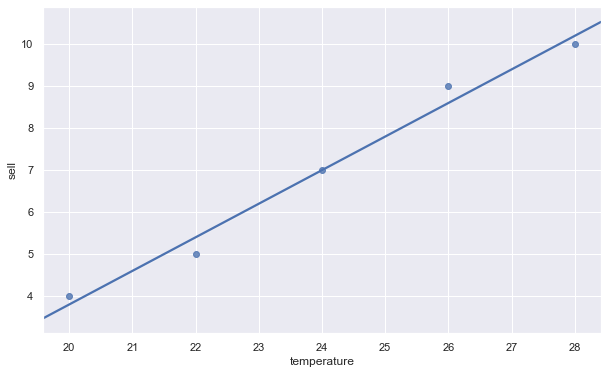

In [2]:
df = pd.DataFrame({'temperature':[28, 26, 20, 24, 22], 'sell':[10, 9, 4, 7, 5]})

plt.figure(figsize=(10, 6))
sns.regplot(x=df.temperature, y=df.sell, ci=0)
plt.show()

上の図のように、すべての点を通る直線は引けないので、**各点からなるべく近い位置を通る直線**を引いています。

<br/>

そして、この各点からなるべく近い位置を通る直線を求めるのに必要なアクションは、**『$y = w_0 + w_1 x_1$の$w_0$と$w_1$を求めること』**でした。

ここで疑問になってくるのが、「*どうやって、$y = w_0 + w_1 x_1$の$w_0$と$w_1$を求めるんだろう*」です。

<br/>

プログラムで書いてしまえば、上の図のように勝手に出力してくれますが、、、とはいえ、どうやって計算されているのか心残りになります。

そこで登場するのが、今回学習する**最小二乗法**です。最小二乗法を使えば、「各点からなるべく近い位置を通る直線(=すなわち単回帰モデル)」のパラメータ($w_0$と$w_1$)を求められます。

### 1.2. 最小二乗法の式

実際のデータを$y_i$、予測値を$\hat{y_i}$とすると、最小二乗法の式は以下のようになります。

$$
\begin{eqnarray}
E(w, b) &=& \frac{1}{2} \sum_{i=1}^{N} (y_i - \hat{y_i})^2\\
&=& \frac{1}{2} \sum_{i=1}^{N} (y_i - (w x_i + b))^2
\end{eqnarray}
$$

つまり、「**実際のデータから予測値を引いたものを、二乗して足し合わせる**」ということになります。

<br/>

この$E(w, b)$が最小になる。

すなわち、実際のデータと予測値の誤差を最小にできる$w$と$b$を求めれば、もともと欲しかった単回帰モデルを求めることができます。

なお、$w$と$b$は公式が決まっているので、必要な値を求めて、あとは代入するだけでOKです。

$$
\begin{eqnarray}
w &=& \frac{\bar{xy}  - \bar{y} \times \bar{x}}{\left(\bar{x^2} - \bar{x} \times \bar{x} \right)}\\
b &=& \bar{y} - w \bar{x}
\end{eqnarray}
$$

*※なお、$\displaystyle \bar{x}$は「$x$の平均」という意味で、$\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$のことです。*

### 1.3. 最小二乗法を手計算で計算する

*少し難しいので、スキップしてもOKです。*

$w$と$b$を求めるには、最小二乗法の式$\displaystyle E(w, b) = \frac{1}{2} \sum_{i=1}^{N} (y_i - (w x_i + b))^2$を最小にする必要があります。

最小二乗法の式を"最小"にできれば、それは「実際のデータと予測値の誤差を最小にできて、より正確な単回帰モデルを作成できる」ということになるわけです。

<br/>

そして、**最小二乗法の良いところは「解析的に求まる(=数式の変形だけで解ける)こと」**です。

なので、今回は実際に、$w$と$b$の値を、数式の変形だけで求めていきましょう。$E(w, b)$を最小にする$w$と$b$を求めるには、$E(w, b)$が最小になる、すなわち「**$E(w, b)$を微分したらゼロになる点を求める**」ということになります。

*「微分してゼロになる点が最小になる」という部分は、そういうものなんだ〜と認識して頂けたらと。*

<br/>

まずは、最小二乗法の式$E(w, b)$を$b$で微分しましょう。そして、$\displaystyle \frac{\partial E}{\partial b}=0$を計算することで、微分してゼロになる$b$を求めていきます。

$$
\begin{eqnarray}
\frac{\partial E}{\partial b} &=& \frac{1}{2} \sum_{i=1}^{N} 2 \times (y_i - (w x_i + b)) \times (-1)\\
&=&\sum_{i=1}^{N}  (- y_i + w x_i + b)\\
&=& 0
\end{eqnarray}
$$

計算すると、上記のようになります。$\displaystyle \sum_{i=1}^{N}$は、$i$に関係しない部分は、単純に$N$個足し合わせるだけなので、結局以下のような式変形になります。

$$
\begin{eqnarray}
\sum_{i=1}^{N}  (- y_i + w x_i + b) &=& - \sum_{i=1}^{N} y_i + w \sum_{i=1}^{N} x_i + bN \\
&=& 0
\end{eqnarray}
$$

$\displaystyle \sum_{i=1}^{N}$の式を右辺に移行しましょう。すると、以下のようになります。

$$bN = \sum_{i=1}^{N} y_i - w \sum_{i=1}^{N} x_i $$

ここで両辺を$N$で割れば、以下の式になります。

$$b = \frac{1}{N} \sum_{i=1}^{N} y_i - w \frac{1}{N} \sum_{i=1}^{N} x_i \tag{1}$$

「$b=$」の式を導出できました。ここで、$\displaystyle \frac{1}{N} \sum_{i=1}^{N} y_i$は、$N$個足し合わせて、$N$で割っているので、要するに「平均」になります。

平均$\displaystyle \frac{1}{N} \sum_{i=1}^{N} y_i$を、$\bar{y}$で表せば、式(1)は以下のようになります。

$$b = \bar{y} - w \bar{x} \tag{2}$$

これで$b$が求まる、、、と思いきや、式の中には$w$が入っています。

$w$はこれから求めないと分からない部分なので、$b$のときと同様に、最小二乗法の式$E(w, b)$を$w$で微分しましょう。

$$
\begin{eqnarray}
\frac{\partial E}{\partial w} &=& \frac{1}{2} \sum_{i=1}^{N} 2 \times (y_i - (w x_i + b)) \times (- x_i) \\
&=& \sum_{i=1}^{N}  (- x_i y_i + w {x_i}^2 + b x_i) \\
&=& 0
\end{eqnarray}
$$

ちょっと余計な部分を前に出してあげましょう。


$$
\begin{eqnarray}
\sum_{i=1}^{N}  (- x_i y_i + w {x_i}^2 + b x_i) &=& - \sum_{i=1}^{N} x_i y_i + w\sum_{i=1}^{N} {x_i}^2 + b \sum_{i=1}^{N} x_i \tag{3}\\
&=& 0
\end{eqnarray}
$$


ここで、先ほど求めた式(2)を、式(3)に代入してあげましょう。
$$
\begin{eqnarray}
- \sum_{i=1}^{N} x_i y_i + w\sum_{i=1}^{N} {x_i}^2 + b \sum_{i=1}^{N} x_i &=& - \sum_{i=1}^{N} x_i y_i + w\sum_{i=1}^{N} {x_i}^2 + (\bar{y} - w \bar{x}) \sum_{i=1}^{N} x_i \\
&=& - \sum_{i=1}^{N} x_i y_i + w\sum_{i=1}^{N} {x_i}^2 + \bar{y} \sum_{i=1}^{N} x_i  - w \bar{x} \sum_{i=1}^{N} x_i \\
&=& - \sum_{i=1}^{N} x_i y_i + \bar{y} \sum_{i=1}^{N} x_i + w\sum_{i=1}^{N} {x_i}^2 - w \bar{x} \sum_{i=1}^{N} x_i \\
&=& - \sum_{i=1}^{N} x_i y_i + \bar{y} \sum_{i=1}^{N} x_i + w \left( \sum_{i=1}^{N} {x_i}^2 - \bar{x} \sum_{i=1}^{N} x_i \right) \\
&=& 0
\end{eqnarray}
$$

代入して変形していくと、上記のようになります。

この最後の式を$N$で割ってあげましょう。そうすると、ふたたび平均$\displaystyle \bar{y} = \frac{1}{N} \sum_{i=1}^{N} y_i$の形で表せます。

$$
\begin{eqnarray}
- \sum_{i=1}^{N} x_i y_i + \bar{y} \sum_{i=1}^{N} x_i + w \left( \sum_{i=1}^{N} {x_i}^2 - \bar{x} \sum_{i=1}^{N} x_i \right) &=& 0\\
- \frac{1}{N} \sum_{i=1}^{N} x_i y_i + \bar{y} \frac{1}{N} \sum_{i=1}^{N} x_i + w \left(\frac{1}{N} \sum_{i=1}^{N} {x_i}^2 - \bar{x} \frac{1}{N} \sum_{i=1}^{N} x_i \right) &=& 0 \\
-\bar{xy}  + \bar{y} \times \bar{x} + w \left(\bar{x^2}  - \bar{x} \times \bar{x} \right) &=& 0 \\
\end{eqnarray}
$$

かなり簡潔な形になってきましたね。あとはこれを、$w=$の形にするだけで完了です。

$$
\begin{eqnarray}
- \bar{xy}  + \bar{y} \times \bar{x} + w \left(\bar{x^2}  - \bar{x} \times \bar{x} \right) &=& 0 \\
w \left(\bar{x^2}  - \bar{x} \times \bar{x} \right) &=& \bar{xy}  - \bar{y} \times \bar{x}\\
w &=& \frac{\bar{xy}  - \bar{y} \times \bar{x}}{\left(\bar{x^2} - \bar{x} \times \bar{x} \right)} \tag{4}
\end{eqnarray}
$$

これで$w$が完成しました。今回は右辺に$b$がないので、データ$(x, y)$があれば手計算できますね。

$b$を求めるときは、

- ①$w$を求める
- ②$w$を使って$b$を求める

上記の手順で求めればOKです。

### 1.4. 最小二乗法を、さらに簡潔にする

最小二乗法で求めたい$w$と$b$は、$E(w,b)$を微分してゼロになることを利用して、以下のように求めることができました。

$$
\begin{eqnarray}
w &=& \frac{\bar{xy}  - \bar{y} \times \bar{x}}{\left(\bar{x^2} - \bar{x} \times \bar{x} \right)}\\
b &=& \bar{y} - w \bar{x}
\end{eqnarray}
$$

この式ですが、確率の知識を使うと、さらに式を簡略化できます。

- $\bar{xy}  - \bar{y} \times \bar{x}$ : 共分散( $Cov(x, y)$ )
- $\bar{x^2} - \bar{x} \times \bar{x}$ : 分散( $V(x)$ )

分散は、データのばらつき具合を表す指標で、「分散が大きい」とデータのばらつきが大きいということになります。なお、分散は「ばらつき具合」なので、マイナスになることはありません。必ず$0$以上の値を取ります。

共分散$Cov(x, y)$は、$x$と$y$の関連の強さを表す指標です。

- 共分散がプラス : $x$が大きいと$y$も大きい
- 共分散がゼロ : $x$と$y$の大小に直接的な意味はない
- 共分散がマイナス : $x$が大きいと$y$は小さくなる


上記のような意味になります。

<br/>

この分散と共分散を使えば、最終的に最小二乗法で求めたい$w$と$b$は以下のようになります。

$$
\begin{eqnarray}
w &=& \frac{Cov(x, y)}{V(x)}\\
b &=& \bar{y} - w \bar{x}
\end{eqnarray}
$$

## 2. 最小二乗法をPythonで計算する

前回の単回帰モデルで、以下の式を導出しました。

$$y =  -36.476 + 9.3764 x$$

今回学習した「最小二乗法」を使って、重みとバイアスの部分を求めてみましょう。

### 2.1 ライブラリの読み込み

今回必要になるライブラリをインポートします。

- Pandas : データ操作用ライブラリ
- Scikit-learn(sklearn) : データの準備ライブラリ

In [14]:
import pandas as pd

from sklearn.datasets import load_boston

### 2.2 データの読み込み

今回も「ボストンの住宅価格」データを取得していきます。
<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 38.9855%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">変数名</span></strong></span></td>
<td style="width: 61.0145%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">データの説明</span></strong></span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CRIM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">犯罪発生率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">ZN</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居区画の密集度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">INDUS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">非小売業の土地割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CHAS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">チャールズ川の周辺か否か</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">NOX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">NOx濃度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居に含まれる平均部屋数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">AGE</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1940年より前に建てられた物件の割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">DIS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">ボストン市の5つの雇用施設からの重み付き距離</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RAD</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">大きな道路へのアクセスのしやすさ</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">TAX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1万ドルあたりの不動産税率の総計</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">PTRATIO</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">教師あたりの生徒数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">B</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">対象地域に住む黒人の比率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">LSTAT</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">低所得者の割合</span></td>
</tr>
</tbody>
</table>


In [4]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


前回の単回帰モデルでは、RM(=住宅に含まれる平均部屋数)とMEDV(=住宅価格)を使っていました。

今回の最小二乗法の計算でも、この2つだけ使っていきます。


### 2.3 データの準備

それでは、単回帰モデルの実装と同じ変数だけ抽出します。

特徴量(=機械学習で使う変数)はRM、予測対象はMEDVでしたね。

In [5]:
x = df['RM']
y = df['MEDV']

print('RMのデータ数:', x.shape)
print('MEDVのデータ数:', y.shape)

RMのデータ数: (506,)
MEDVのデータ数: (506,)


### 2.4 実際に計算する

それでは、実際に計算していきましょう。$w$と$b$に必要な値を求めていきます。

$$
\begin{eqnarray}
w &=& \frac{\bar{xy}  - \bar{y} \times \bar{x}}{\left(\bar{x^2} - \bar{x} \times \bar{x} \right)}\\
b &=& \bar{y} - w \bar{x}
\end{eqnarray}
$$



In [6]:
calc_df = pd.DataFrame({'x':x, 'y':y})
print(calc_df.shape)
calc_df.head()

(506, 2)


,x,y
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [7]:
calc_df = calc_df.assign(
    x2 = lambda df:df.x*df.x,
    xy = lambda df:df.x*df.y
)

In [8]:
calc_df.head()

,x,y,x2,xy
0,6.575,24.0,43.230625,157.8000
1,6.421,21.6,41.229241,138.6936
2,7.185,34.7,51.624225,249.3195
3,6.998,33.4,48.972004,233.7332
4,7.147,36.2,51.079609,258.7214


In [9]:
x_mean = calc_df.x.mean()
y_mean = calc_df.y.mean()
x2_mean = calc_df.x2.mean()
xy_mean = calc_df.xy.mean()

In [10]:
print(x_mean)
print(y_mean)
print(x2_mean)
print(xy_mean)

6.284634387351787
22.532806324110698
39.98932459881428
146.09501501976288


In [11]:
w = (xy_mean - x_mean*y_mean)/(x2_mean - x_mean * x_mean)
print(w)

9.102108981180658


In [12]:
b = y_mean - w * x_mean
print(b)

-34.6706207764408


最小二乗法の式で$w$と$b$を求めてみました。

プログラムで出力したときは$y =  -36.476 + 9.3764 x$でしたが、手計算で計算すると若干の誤差が生じますね。

これはコンピューターの問題なので、気にしなくて大丈夫です。

このような面倒な計算を、機械学習ライブラリ`Scikit-learn`を使えば自動的に計算してくれます。ライブラリは偉大ですね。

In [13]:
#notebookをpythonファイルに変換
# ! jupyter nbconvert --to script ml03_least_squares_method.ipynb

[NbConvertApp] Converting notebook ml03_least_squares_method.ipynb to script
[NbConvertApp] Writing 11896 bytes to ml03_least_squares_method.py
